In [5]:
#import the libraries
import os

#os.chdir('/home/david/Dropbox/KAROLINSKA/task/POSITIONS/L3_d0,2&7_rad8_resp_same')
os.chdir('C:\\Users\\David\\Dropbox\\KAROLINSKA\\task\\POSITIONS\\L3_d0,2&7_rad8_resp_same')

save_path= 'C:\\Users\\David\\Dropbox\\KAROLINSKA\\fMRI_beh_analysis\\'

%run "C:\\Users\\David\\Dropbox\\KAROLINSKA\\task\\POSITIONS\\L3_d0,2&7_rad8_resp_same\\Funciones.ipynb"

from numpy import loadtxt, shape, array, zeros, delete, argsort, mean, std, unique
import itertools
from itertools import chain
import matplotlib.pyplot as plt
import pickle
from pickle import *
import pandas as pd
import statsmodels.formula.api as sm
from scipy.stats import norm, ttest_1samp


#Differences with the other
#Indices_columns
TYPE=0 
delay1=1
delay2=2
A_T=3
A_NT1=4
A_NT2=5
A_dist=6
A_NT1_dist=7
A_NT2_dist=8
distance_T_dist=9
cue_resp=10
order=11
orient=12
horiz_vertical=13
A_R=14
A_err=15
Abs_angle_error=16
Error_interference=17
A_DC=18 #target???
A_DC_dist=19
Q_DC=20
A_DF=21
A_DF_dist=22
Q_DF=23
A_DVF=24
Q_DVF=25
A_DVF_dist=26
Q_DVF_dist=27
trial_time=28
presentation_att_cue_time=28
presentation_target_time=29
presentation_dist_time=30
presentation_probe_time=31
R_T=32
trial_time=33
disp_time=34
subject_label=35
subj_session=36

In [6]:
#os.chdir('/home/david/Desktop/IEM_data')
root = 'C:\\Users\\David\\Desktop\\KI_Desktop\\IEM_data'


##All data
data= open('C:\\Users\\David\\Desktop\\KI_Desktop\\IEM_data\\r001\\WMtask\\s08\\r01\\wm_beh.txt',"r") #'r001/WMtask/s08/r01/wm_beh.txt'
files=['r001/WMtask/s08/r02/wm_beh.txt', 'r001/WMtask/s08/r03/wm_beh.txt', 'r001/WMtask/s08/r04/wm_beh.txt', 'r001/WMtask/s08/r05/wm_beh.txt', 'r001/WMtask/s08/r06/wm_beh.txt',
       'r001/WMtask/s09/r01/wm_beh.txt', 'r001/WMtask/s09/r02/wm_beh.txt', 'r001/WMtask/s09/r03/wm_beh.txt', 'r001/WMtask/s09/r04/wm_beh.txt',
       'r001/WMtask/s10/r01/wm_beh.txt', 
       
       'd001/WMtask/s10/r01/wm_beh.txt', 'd001/WMtask/s10/r02/wm_beh.txt', 'd001/WMtask/s10/r03/wm_beh.txt', 'd001/WMtask/s10/r04/wm_beh.txt', 'd001/WMtask/s10/r05/wm_beh.txt',
       'd001/WMtask/s11/r01/wm_beh.txt', 'd001/WMtask/s11/r02/wm_beh.txt', 'd001/WMtask/s11/r03/wm_beh.txt',
       'd001/WMtask/s12/r01/wm_beh.txt', 'd001/WMtask/s12/r02/wm_beh.txt', 
       'd001/WMtask/s13/r01/wm_beh.txt', 'd001/WMtask/s13/r02/wm_beh.txt', 'd001/WMtask/s13/r03/wm_beh.txt',
       
       
       'n001/WMtask/s01/r01/wm_beh.txt', 'n001/WMtask/s01/r02/wm_beh.txt', 'n001/WMtask/s01/r03/wm_beh.txt', 'n001/WMtask/s01/r04/wm_beh.txt', 'n001/WMtask/s01/r05/wm_beh.txt',
       'n001/WMtask/s02/r01/wm_beh.txt', 'n001/WMtask/s02/r02/wm_beh.txt', 'n001/WMtask/s02/r03/wm_beh.txt', 'n001/WMtask/s02/r04/wm_beh.txt', 
       'n001/WMtask/s03/r01/wm_beh.txt', 'n001/WMtask/s03/r02/wm_beh.txt', 'n001/WMtask/s03/r03/wm_beh.txt', 'n001/WMtask/s03/r04/wm_beh.txt', 'n001/WMtask/s03/r05/wm_beh.txt',
       
       
       'b001/WMtask/s01/r01/wm_beh.txt', 'b001/WMtask/s01/r02/wm_beh.txt', 'b001/WMtask/s01/r03/wm_beh.txt', 'b001/WMtask/s01/r04/wm_beh.txt', 'b001/WMtask/s01/r05/wm_beh.txt',
       'b001/WMtask/s02/r01/wm_beh.txt', 'b001/WMtask/s02/r02/wm_beh.txt', 'b001/WMtask/s02/r03/wm_beh.txt', 'b001/WMtask/s02/r04/wm_beh.txt', 'b001/WMtask/s02/r05/wm_beh.txt',
       'b001/WMtask/s03/r01/wm_beh.txt', 'b001/WMtask/s03/r02/wm_beh.txt', 'b001/WMtask/s03/r03/wm_beh.txt', 'b001/WMtask/s03/r04/wm_beh.txt',
       
       
       'l001/WMtask/s01/r01/wm_beh.txt', 'l001/WMtask/s01/r02/wm_beh.txt', 'l001/WMtask/s01/r03/wm_beh.txt', 
       'l001/WMtask/s02/r01/wm_beh.txt', 'l001/WMtask/s02/r02/wm_beh.txt', 'l001/WMtask/s02/r03/wm_beh.txt', 
       'l001/WMtask/s03/r01/wm_beh.txt', 'l001/WMtask/s03/r02/wm_beh.txt', 'l001/WMtask/s03/r03/wm_beh.txt', 'l001/WMtask/s03/r04/wm_beh.txt', 
       'l001/WMtask/s04/r01/wm_beh.txt', 'l001/WMtask/s04/r02/wm_beh.txt', 'l001/WMtask/s04/r03/wm_beh.txt', 'l001/WMtask/s04/r04/wm_beh.txt',
       
       
       's001/WMtask/s01/r01/wm_beh.txt', 's001/WMtask/s01/r02/wm_beh.txt',  
       's001/WMtask/s02/r01/wm_beh.txt', 
       's001/WMtask/s03/r01/wm_beh.txt', 's001/WMtask/s03/r02/wm_beh.txt', 's001/WMtask/s03/r03/wm_beh.txt', 's001/WMtask/s03/r04/wm_beh.txt', 's001/WMtask/s03/r05/wm_beh.txt', 
       's001/WMtask/s04/r01/wm_beh.txt', 's001/WMtask/s04/r02/wm_beh.txt', 
       's001/WMtask/s05/r01/wm_beh.txt', 's001/WMtask/s05/r02/wm_beh.txt']





data = data.readlines()
del(data[0])
del(data[-1])
data=loadtxt(data)
subject_column=zeros((len(data), 1))
session_column=zeros((len(data), 1))
index=subject_number('r001')

for j in range(0, len(data)):
    subject_column[j] = index
    session_column[j] = int('1')

data=numpy.hstack((data, subject_column, session_column)) 




DATA=data

for i in range(0, len(files)):
    #
    p = files[i]
    path=root + '\\' + p
    path = path.replace('/', os.path.sep )
    #
    data= open(path,"r") #files[i]
    data = data.readlines()
    del(data[0])
    del(data[-1])
    data=loadtxt(data)
    subject_column=zeros((len(data), 1))
    session_column=zeros((len(data), 1))
    index=subject_number(files[i].split('/')[0])  #files[i].split('/')[2][:4]
    
    for j in range(0, len(data)):
        subject_column[j] = index
        session_column[j] = int(files[i].split('/')[3][1:]) #files[i].split('/')[2].split('_')[2]
    
    data=numpy.hstack((data, subject_column, session_column)) 
    
    DATA=numpy.vstack((DATA, data))



data=DATA
all_data_len=len(data)

In [7]:
## Remove wrong trials

print(len(data))

resp_out = array([get_quadrant(data[i, A_R]) != get_quadrant(data[i, A_T]) for i in range(0, len(data))])
indexs_out_trials = array(range(0,len(data)))[resp_out]
indexs_out_trials


no_resp = array([data[i, A_R] == 0 or data[i, A_R] == 90 or data[i, A_R] == 90
                 or data[i, A_R] == 180 or data[i, A_R] == 270  or data[i, A_R] == 360 for i in range(0, len(data))])

indexs_no_resp = array(range(0,len(data)))[no_resp]

wrong_trials = list(indexs_out_trials) + list(indexs_no_resp)
indexs_wrong_trials = list(set(wrong_trials))

print(indexs_wrong_trials)
print('Number of wrong trials = ' + str(len(indexs_wrong_trials)))


wrong_trials=zeros((len(indexs_wrong_trials), shape(data)[1]))

for i in range(0, len(indexs_wrong_trials)):
    wrong_trials[i,:]=data[indexs_wrong_trials[i],:]


data=delete(data, indexs_wrong_trials, axis=0)

print(len(data))


2111
[1542, 527, 1552, 529, 1553, 1554, 1555, 1556, 1557, 535, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 555, 567, 1594, 574, 1613, 1614, 1615, 591, 1617, 1616, 1619, 1618, 1621, 1620, 1623, 600, 1622, 605, 1119, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 628, 632, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1160, 1161, 1672, 1673, 1674, 1675, 1676, 1690, 1191, 706, 707, 718, 211, 1254, 1787, 1295, 1844, 311, 315, 330, 331, 337, 349, 1375, 1379, 367, 370, 380, 385, 392, 415, 440, 442, 451, 1476, 2005, 481, 499, 1525]
Number of wrong trials = 112
1999


In [8]:
#Create DataFrame

D = pd.DataFrame(data)
D.loc[:, orient][D.loc[:, orient]==-1] = 2 #"cond": D.loc[:, orient]

df = pd.DataFrame({"type": D.loc[:,TYPE], 'delay':D.loc[:, delay1], 'delay2':D.loc[:, delay2], 'A_T':D.loc[:, A_T],
                   'A_NT1':D.loc[:, A_NT1], 'A_NT2':D.loc[:, A_NT2], 'A_dist':D.loc[:, A_dist], "A_NT1_dist": D.loc[:, A_NT1_dist],
                   "A_NT2_dist": D.loc[:, A_NT2_dist], "distance": D.loc[:, distance_T_dist], "cue_resp": D.loc[:, cue_resp],
                   "order": D.loc[:, order], "orient": D.loc[:, orient], "horiz_vertical": D.loc[:, horiz_vertical],
                   'A_res':D.loc[:, A_R], 'A_err':D.loc[:, A_err],"A_err_abs": D.loc[:, Abs_angle_error],
                   "A_err_int_theoretical": D.loc[:, Error_interference], "A_DC": D.loc[:, A_DC], "A_DC_dis": D.loc[:, A_DC_dist],
                   "Q_DC": D.loc[:, Q_DC], "A_DF": D.loc[:, A_DF], "A_DF_dist": D.loc[:, A_DF_dist], "Q_DF": D.loc[:, Q_DF],
                   "A_DVF": D.loc[:, A_DVF], "Q_DVF": D.loc[:, Q_DVF], "A_DVF_dist": D.loc[:, A_DVF_dist], "Q_DVF_dist": D.loc[:, Q_DVF_dist],
                   "trial_time":D.loc[:,trial_time], "att_cue_time":D.loc[:, presentation_att_cue_time], "target_time":D.loc[:, presentation_target_time],
                   "dist_time":D.loc[:, presentation_dist_time], "probe_time":D.loc[:, presentation_probe_time], "RT":D.loc[:, R_T],
                   "disp_time":D.loc[:, disp_time],"subject": D.loc[:, subject_label], "session": D.loc[:, subj_session]})




df.head()

,A_DC,A_DC_dis,A_DF,A_DF_dist,A_DVF,A_DVF_dist,A_NT1,A_NT1_dist,A_NT2,A_NT2_dist,...,distance,horiz_vertical,order,orient,probe_time,session,subject,target_time,trial_time,type
0,142.0,126.0,241.0,214.7,321.0,64.0,241.0,214.7,321.0,64.0,...,16.0,1.0,1.0,2.0,60.728,1.0,26.0,48.018,65.750,1.0
1,51.0,65.1,114.0,134.2,204.0,311.0,51.0,65.1,114.0,134.2,...,107.0,1.0,2.0,0.0,87.114,1.0,26.0,74.760,92.136,3.0
2,200.0,216.7,139.0,159.5,63.0,305.0,200.0,216.7,139.0,159.5,...,118.0,1.0,1.0,0.0,106.495,1.0,26.0,93.786,111.517,3.0
3,223.0,204.2,156.0,126.5,296.0,53.0,223.0,204.2,156.0,126.5,...,117.0,1.0,2.0,0.0,132.880,1.0,26.0,120.525,137.903,3.0
4,42.0,29.4,232.0,206.6,312.0,113.0,42.0,29.4,232.0,206.6,...,161.0,0.0,1.0,0.0,152.264,1.0,26.0,139.552,157.284,3.0


In [9]:
#Remove out of 95%
#The wrong trials >90 were already removed before in the creation of the file)
Bef_len = len(df)
frames=[]
list_subjects = [int(df.subject.unique()[i]) for i in range(0, len(df.subject.unique()))]
print(list_subjects)


for Subject in list_subjects:
    sub_group=df.groupby('subject').get_group(Subject)
    interval = sub_group.quantile([0.95]).unstack(level=1)
    interval = interval['A_err_abs']
    #removed_out = sub_group.loc[(sub_group['A_err_abs']>interval.iloc[0]) & (sub_group['A_err_abs']<interval.iloc[1])] 
    keep = sub_group.loc[sub_group['A_err_abs']<interval.iloc[0]] 
    frames.append(  keep   )
    
    #Print the result
    before_outliers=len(sub_group)
    after_outliers=len(keep)
    print('Outliers in ' + str(Subject) + ' = ' +str(before_outliers-after_outliers)  )  


    
df = pd.concat(frames)
df['A_err_theoretical'] = df['A_err'].copy()
After_len = len(df)
out_num = Bef_len - After_len

[26, 27, 22, 23, 24, 25]
Outliers in 26 = 18
Outliers in 27 = 17
Outliers in 22 = 24
Outliers in 23 = 19
Outliers in 24 = 17
Outliers in 25 = 17


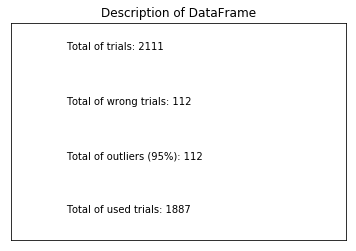

In [10]:
########## Describe the data
plt.figure()
plt.title('Description of DataFrame')
## In thi graph you should not find any trials between the limits
plt.text(0,7, 'Total of trials: '+ str(all_data_len))
plt.text(0,5, 'Total of wrong trials: '+ str(len(wrong_trials)))
plt.text(0,3, 'Total of outliers (95%): '+ str(out_num))
plt.text(0,1, 'Total of used trials: '+ str(len(df)))
plt.ylim(0,8)
plt.xlim(-1,5)
plt.xticks([])
plt.yticks([])
plt.show(block=False)

In [11]:
## Correct the distractor (real and theoretical) (real is the closest)
real_dist = give_closer_dist_angle(list(df.A_T), list(df.A_dist), list(df.A_NT1_dist), list(df.A_NT2_dist))
df['theoretical_dist']=df['A_dist'].copy()
df['A_dist'] = real_dist


In [12]:
# In the preprocess we will change the A_err, so we will keep the one as the theoretical one
df['A_err_raw'] = df['A_err'].copy()  # target - response (raw) 

## Add the theoretical interference (raw
raw_interference = Interference_effects(list(df.A_T), list(df.A_res), list(df.A_dist))
df['Interference_raw'] = raw_interference

#To unify psychophysics and fMRI
df['A_err_int_theoretical'] = raw_interference
df['Interference'] = raw_interference
df['A_R'] = df['A_res'].copy()  # target - response (raw) 


C:\Users\David\Anaconda2\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\David\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


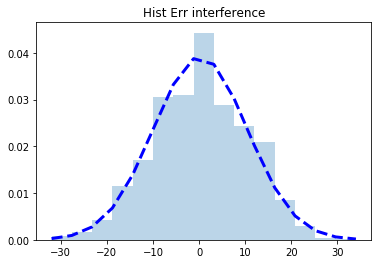

C:\Users\David\Anaconda2\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\David\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


Mean      Sigma
0.253312  10.185532


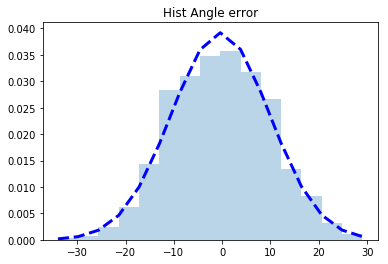

Mean      Sigma
-0.372019  10.181887


In [13]:
#Some plots

#Histogram of the error interference (with a fitted gaussian distribution)
plt.title('Hist Err interference')
n_bins=15
HIST=plt.hist(df['Interference_raw'], bins=n_bins, alpha=0.3, normed=1)[1]
mu, sigma=norm.fit(df['Interference_raw'])
y_err = plt.mlab.normpdf(HIST, mu, sigma)
plt.plot( HIST, y_err, 'b--', linewidth=3)
plt.show()
dn = pd.DataFrame({"Mean": [mu], "Sigma":[sigma]})
print(dn.to_string(index=False))


#Histogram of the angle error (with a fitted gaussian distribution)
plt.title('Hist Angle error')
n_bins=15
HIST=plt.hist(df['A_err_raw'], bins=n_bins, alpha=0.3, normed=1)[1]
mu, sigma=norm.fit(df['A_err_raw'])
y_err = plt.mlab.normpdf(HIST, mu, sigma)
plt.plot( HIST, y_err, 'b--', linewidth=3)
plt.show()
dn = pd.DataFrame({"Mean": [mu], "Sigma":[sigma]})
print(dn.to_string(index=False))


In [14]:
#Save in a file named data_L3_distractors_fMRI (pickle)
os.chdir(save_path)
df.to_csv('behaviour_fMRI')
#df.to_pickle('data_fMRI')
#os.chdir('/home/david/Dropbox/KAROLINSKA/fMRI_beh_analysis')
#pickle.dump( data, open( "data_L3_distractors_fMRI.p", "wb" ) )

In [15]:
len(df)

1887